<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/Lung_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Loading

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data loading
df=pd.read_csv('/content/lungcancer_med.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [ ]:
# Check for null values
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


**Here Id value unique there is no impact on target column**

In [ ]:
# Drop the Id column
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


**Descriptive Statistics of Data**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,890000.0,55.007008,9.994485,4.0,48.0,55.0,62.0,104.0
bmi,890000.0,30.494172,8.368539,16.0,23.3,30.5,37.7,45.0
cholesterol_level,890000.0,233.633916,43.432278,150.0,196.0,242.0,271.0,300.0
hypertension,890000.0,0.750024,0.432999,0.0,1.0,1.0,1.0,1.0
asthma,890000.0,0.469740,0.499084,0.0,0.0,0.0,1.0,1.0
cirrhosis,890000.0,0.225956,0.418211,0.0,0.0,0.0,0.0,1.0
other_cancer,890000.0,0.088157,0.283524,0.0,0.0,0.0,0.0,1.0
survived,890000.0,0.220229,0.414401,0.0,0.0,0.0,0.0,1.0


###Exploratory Data Analysis

In [ ]:
df['age'].min()

4.0

Text(0.5, 1.0, 'Age Distribution')

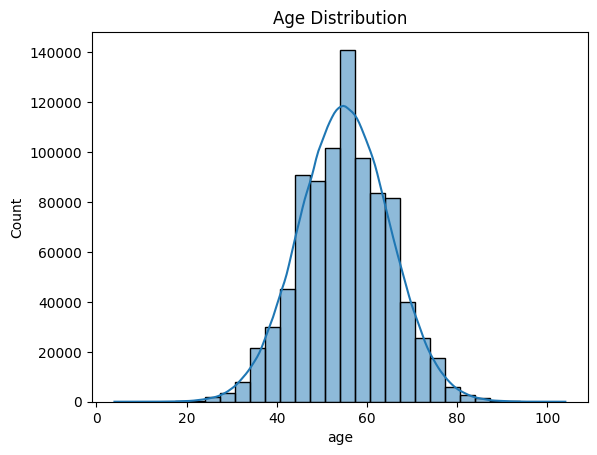

In [ ]:
sns.histplot(df['age'],bins=30,kde=True)
plt.title('Age Distribution')

**Since it is real world data and it is normally distributed doesnot need to remove outliers**

In [ ]:
def age(x):
  if x<=30:
    return 'youth'
  elif x>30 and x<=50:
    return 'middle'
  else:
    return 'old'
df['age_group']=df['age'].apply(lambda x:age(x))

Text(0.5, 1.0, 'Age group vs Survival')

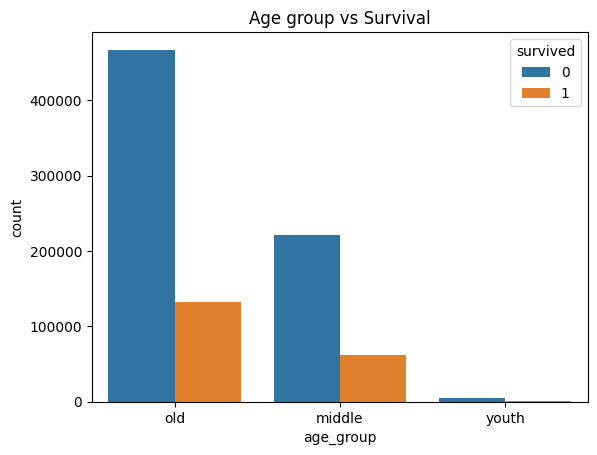

In [ ]:
sns.countplot(data=df,x='age_group',hue='survived')
plt.title('Age group vs Survival')

**Above information most of the old age people are died**

Text(0.5, 1.0, 'Gender vs Survival')

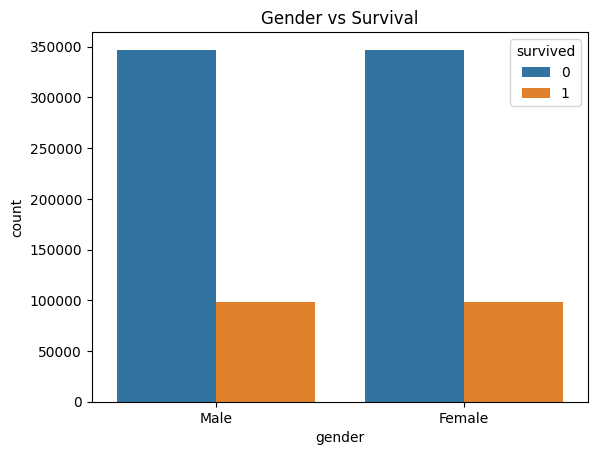

In [ ]:
sns.countplot(data=df,hue=df['survived'],x=df['gender'])
plt.title('Gender vs Survival')

**Gender is no effect in survival column**

In [ ]:
# Check how many unique countries
len(df['country'].unique())

27

In [ ]:
# Group by country survival count
df.groupby('country')['survived'].value_counts()

country         survived
Austria         0           25679
                1            7153
Belgium         0           25743
                1            7243
Bulgaria        0           25384
                1            7175
Croatia         0           25851
                1            7287
Cyprus          0           25508
                1            7211
Czech Republic  0           25554
                1            7331
Denmark         0           25778
                1            7246
Estonia         0           25554
                1            7339
Finland         0           25502
                1            7296
France          0           26036
                1            7163
Germany         0           25660
                1            7280
Greece          0           25797
                1            7255
Hungary         0           25729
                1            7252
Ireland         0           25962
                1            7281
Italy           0           25815
                1            7133
Latvia          0           25319
                1            7246
Lithuania       0           25661
                1            7195
Luxembourg      0           25510
                1            7284
Malta           0           25941
                1            7426
Netherlands     0           25685
                1            7355
Poland          0           25666
                1            7283
Portugal        0           25836
                1            7372
Romania         0           25645
                1            7318
Slovakia        0           25712
                1            7141
Slovenia        0           25730
                1            7275
Spain           0           25743
                1            7299
Sweden          0           25996
                1            7165
Name: count, dtype: int64

Text(0.5, 1.0, 'Country wise survival')

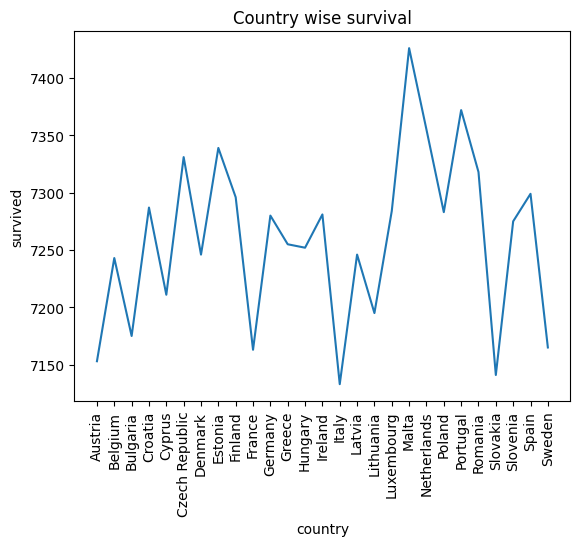

In [ ]:
country_wise=df.groupby('country')
sns.lineplot(country_wise['survived'].sum())
plt.xticks(rotation=90)
plt.title('Country wise survival')

**Average survival rate is okay but the countries like Bulgaria,Italy,Lithunia,slovakia and Swedan and least survival rate.**

In [ ]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,age_group
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,old
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,middle
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,old
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,old
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,middle


Text(0.5, 1.0, 'Correlation Matrix')

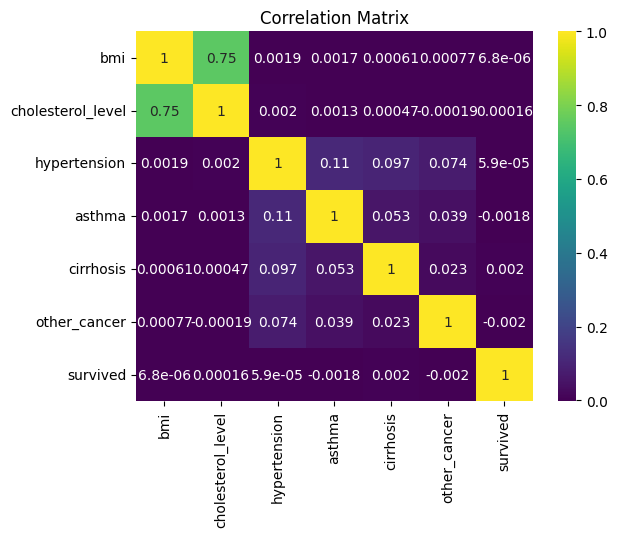

In [ ]:
# Correlation Matrix for survival vs other nu merical columns
sns.heatmap(df[['bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer','survived']].corr(),annot=True,cmap='viridis')
plt.title('Correlation Matrix')

In [ ]:
# Survival based on the Cancer Stage
df.groupby('cancer_stage')['survived'].value_counts()

cancer_stage  survived
Stage I       0           173978
              1            48538
Stage II      0           173245
              1            49118
Stage III     0           173506
              1            49088
Stage IV      0           173267
              1            49260
Name: count, dtype: int64

**In this data cancer_stage has no effect on survival**

In [ ]:
# Survival count based on the family genetics history
df.groupby('family_history')['survived'].value_counts()

family_history  survived
No              0           347383
                1            97798
Yes             0           346613
                1            98206
Name: count, dtype: int64

**In this data family_history has no effect on survival**

Text(0.5, 1.0, 'BMI vs Cholesterol Level')

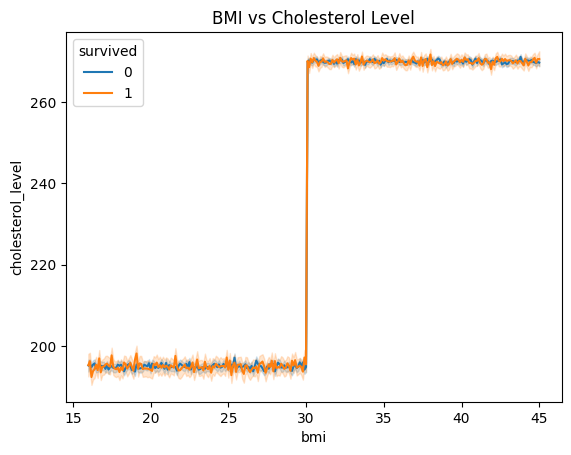

In [ ]:
sns.lineplot(data=df,x='bmi',y='cholesterol_level',hue='survived')
plt.title('BMI vs Cholesterol Level')

**Above 30 of bmi leads to more cholesterol level**

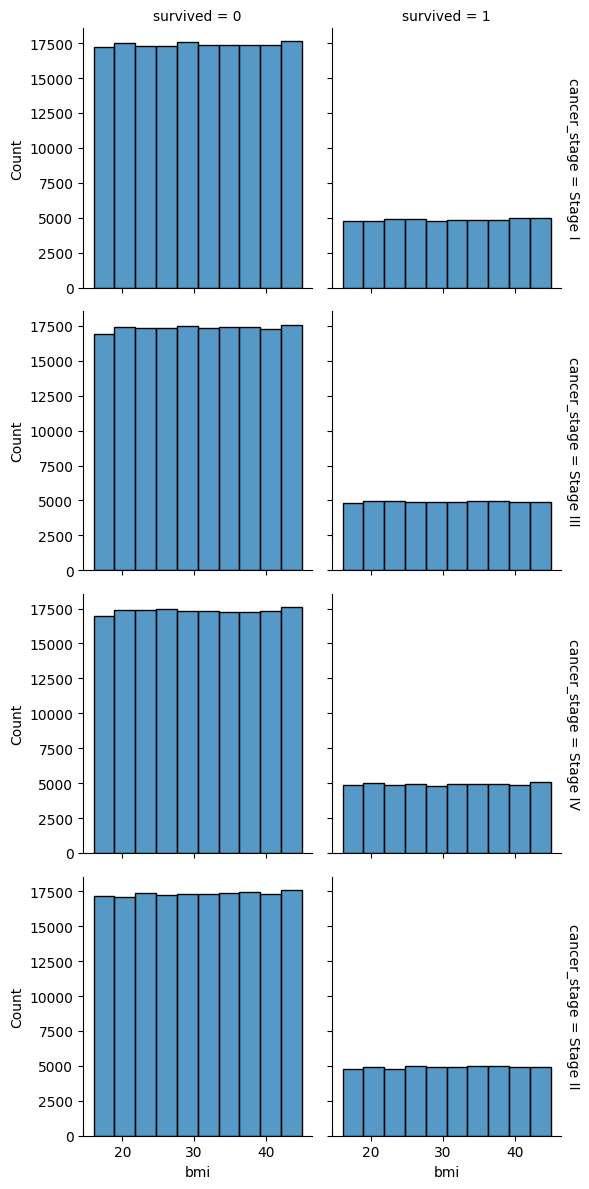

In [ ]:
sns.displot(
    df, x="bmi", col="survived", row="cancer_stage",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

###Data Preprocessing

In [ ]:
len(df['diagnosis_date'].value_counts())

3651

In [ ]:
# Change the disease startdate to years
df['startdate']=df['diagnosis_date'].apply(lambda x:x.split('-')[0])
df['startdate']=df['startdate'].astype(int)

In [ ]:
# Change the disease enddate to years
df['enddate']=df['end_treatment_date'].apply(lambda x:x.split('-')[0])
df['enddate']=df['enddate'].astype(int)

In [ ]:
# Creating the Duration of disease in years
df['Duration(years)']=df['enddate']-df['startdate']

In [ ]:
# Unique values of Duration(years)
df['Duration(years)'].unique()

array([1, 2, 0])

In [ ]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,age_group,startdate,enddate,Duration(years)
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,old,2016,2017,1
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,middle,2023,2024,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,old,2023,2024,1
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,old,2016,2017,1
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,middle,2023,2025,2


In [ ]:
df['cancer_stage'].unique()

array(['Stage I', 'Stage III', 'Stage IV', 'Stage II'], dtype=object)

In [ ]:
# Encoding the cancer_stage categorial column to numerical
def can_stage(x):
  if x=='Stage I':
    return 1
  elif x=='Stage II':
    return 2
  elif x=='Stage III':
    return 3
  else:
    return 4
df['Stage']=df['cancer_stage'].apply(lambda x:can_stage(x))

In [ ]:
# Droping the column
df.drop('cancer_stage',axis=1,inplace=True)

In [ ]:
df.head()

,age,gender,country,diagnosis_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,age_group,startdate,enddate,Duration(years),Stage
0,64.0,Male,Sweden,2016-04-05,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,old,2016,2017,1,1
1,50.0,Female,Netherlands,2023-04-20,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,middle,2023,2024,1,3
2,65.0,Female,Hungary,2023-04-05,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,old,2023,2024,1,3
3,51.0,Female,Belgium,2016-02-05,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,old,2016,2017,1,1
4,37.0,Male,Luxembourg,2023-11-29,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,middle,2023,2025,2,1


In [ ]:
# Encoding the column
df['family']=df['family_history'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
df['family'].value_counts()

,count
family,
0,445181
1,444819


In [ ]:
# Check unique values for this column
df['smoking_status'].unique()

array(['Passive Smoker', 'Former Smoker', 'Never Smoked',
       'Current Smoker'], dtype=object)

In [ ]:
# Check the unique values for this column
df['treatment_type'].unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   family_history      890000 non-null  object 
 5   smoking_status      890000 non-null  object 
 6   bmi                 890000 non-null  float64
 7   cholesterol_level   890000 non-null  int64  
 8   hypertension        890000 non-null  int64  
 9   asthma              890000 non-null  int64  
 10  cirrhosis           890000 non-null  int64  
 11  other_cancer        890000 non-null  int64  
 12  treatment_type      890000 non-null  object 
 13  end_treatment_date  890000 non-null  object 
 14  survived            890000 non-null  int64  
 15  age_group           890000 non-nul

In [ ]:
# One-Hot Encoding the treatment_type column
df = pd.get_dummies(df,columns=['treatment_type'],prefix='treat', drop_first=False)

In [ ]:
# Encoding the column
df['sex']=df['gender'].apply(lambda x:1 if x=='Male' else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   family_history      890000 non-null  object 
 5   smoking_status      890000 non-null  object 
 6   bmi                 890000 non-null  float64
 7   cholesterol_level   890000 non-null  int64  
 8   hypertension        890000 non-null  int64  
 9   asthma              890000 non-null  int64  
 10  cirrhosis           890000 non-null  int64  
 11  other_cancer        890000 non-null  int64  
 12  end_treatment_date  890000 non-null  object 
 13  survived            890000 non-null  int64  
 14  age_group           890000 non-null  object 
 15  startdate           890000 non-nul

In [ ]:
# One Hot Encoding the column
df = pd.get_dummies(df, columns=['country'], drop_first=False)

In [ ]:
# Removing the Object type Unneccesary features for modeling
df.drop(['gender','diagnosis_date','family_history','smoking_status','end_treatment_date','age_group','startdate','enddate'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived', 'Duration(years)', 'Stage',
       'family', 'treat_Chemotherapy', 'treat_Combined', 'treat_Radiation',
       'treat_Surgery', 'sex', 'country_Austria', 'country_Belgium',
       'country_Bulgaria', 'country_Croatia', 'country_Cyprus',
       'country_Czech Republic', 'country_Denmark', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hungary', 'country_Ireland', 'country_Italy',
       'country_Latvia', 'country_Lithuania', 'country_Luxembourg',
       'country_Malta', 'country_Netherlands', 'country_Poland',
       'country_Portugal', 'country_Romania', 'country_Slovakia',
       'country_Slovenia', 'country_Spain', 'country_Sweden'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     890000 non-null  float64
 1   bmi                     890000 non-null  float64
 2   cholesterol_level       890000 non-null  int64  
 3   hypertension            890000 non-null  int64  
 4   asthma                  890000 non-null  int64  
 5   cirrhosis               890000 non-null  int64  
 6   other_cancer            890000 non-null  int64  
 7   survived                890000 non-null  int64  
 8   Duration(years)         890000 non-null  int64  
 9   Stage                   890000 non-null  int64  
 10  family                  890000 non-null  int64  
 11  treat_Chemotherapy      890000 non-null  bool   
 12  treat_Combined          890000 non-null  bool   
 13  treat_Radiation         890000 non-null  bool   
 14  treat_Surgery       

In [ ]:
df.shape

(890000, 43)

###Model Development

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Conv2D, Flatten
from keras.optimizers import Adam  # or SGD, RMSprop, etc.
from keras.losses import binary_crossentropy  # or binary_crossentropy, etc.


In [ ]:
#df=df.sample(1000)

In [ ]:
(df['survived'].value_counts()/len(df['survived']))*100

,count
survived,
0,77.977079
1,22.022921


In [ ]:
X=df.drop('survived',axis=1)
y=df['survived']

In [ ]:
sc=StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101,stratify=y)

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
def build_ann():
    model = Sequential()
    model.add(Dense(64,input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [ ]:
model = build_ann()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7788 - loss: 0.5317 - val_accuracy: 0.7794 - val_loss: 0.5289
Epoch 2/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7794 - loss: 0.5282 - val_accuracy: 0.7794 - val_loss: 0.5280
Epoch 3/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7808 - loss: 0.5262 - val_accuracy: 0.7794 - val_loss: 0.5279
Epoch 4/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.7791 - loss: 0.5280 - val_accuracy: 0.7794 - val_loss: 0.5277
Epoch 5/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7797 - loss: 0.5273 - val_accuracy: 0.7794 - val_loss: 0.5277
Epoch 6/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7799 - loss: 0.5271 - val_accuracy: 0.7794 - val_loss: 0.5278
Epoch 7/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7799 - loss: 0.5269 - val_accuracy: 0.7794 - val_loss: 0.5278
Epoch 8/20
15575/15575 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 

In [ ]:
predictions=model.predict(X_test_scaled)

8344/8344 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


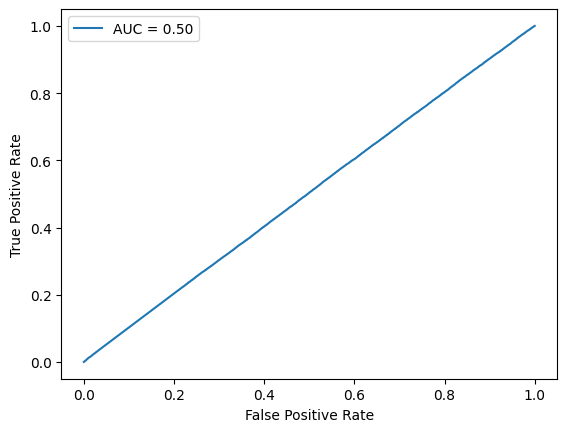

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

probs = model.predict(X_test_scaled)  # Probabilities for the positive class
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()